<a href="https://colab.research.google.com/github/stly1996/Colab-DL/blob/main/PyTorch/Curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch; torch.manual_seed(0)
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML  #for create animation

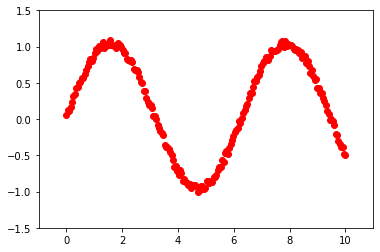

In [2]:
length = 200
x = torch.linspace(0, 10, length).reshape(length, 1)  
#create a tensor containing wqually spaced number from 1 to 0, 200 numbers in total
y = torch.sin(x) + 0.1 * torch.rand(x.size())

x_plot = x.data.numpy().copy()
y_plot = y.data.numpy().copy()

plt.scatter(x_plot, y_plot, c='r')
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

In [3]:
class SingleHidden(torch.nn.Module):
    def __init__(self, n_hidden):
        super(SingleHidden, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden)
        self.relu = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden, 1)
        
    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        
        return out

In [15]:
n_epoch = 200
learning_rate = 0.01

model = SingleHidden(20) 
#SingleHidden(5): initailize an instance of a current neuron net model with 5 nodes in hidden layer
#increase the number of nodes of hidden layer, generally means the neural network can detect more subtleties from dataset 
#but high nodes may lead to overfitting
#lower the nodes so that a model is not too complicated
#finding the optimal number of nodes in a layer is one of the most common way in neural network
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [16]:
frame = 5  #5 of data available in frame, the number include in the animation
#so the data is saved every five epochs 
predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')
    
    if epoch % frame == 0:
        predictions.append(y_preds)

Epoch 10. Loss: 0.0033
Epoch 20. Loss: 0.0030
Epoch 30. Loss: 0.0094
Epoch 40. Loss: 0.0608
Epoch 50. Loss: 0.2356
Epoch 60. Loss: 0.1897
Epoch 70. Loss: 0.2327
Epoch 80. Loss: 0.2312
Epoch 90. Loss: 0.0316
Epoch 100. Loss: 0.0079
Epoch 110. Loss: 0.0010
Epoch 120. Loss: 0.0145
Epoch 130. Loss: 0.0864
Epoch 140. Loss: 0.1640
Epoch 150. Loss: 0.0038
Epoch 160. Loss: 0.2512
Epoch 170. Loss: 0.1497
Epoch 180. Loss: 0.0519
Epoch 190. Loss: 0.0271
Epoch 200. Loss: 0.0163


In [17]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    fitted_line.set_data(x_plot, predictions[i])
    return (fitted_line,)



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epoch//frame, interval=n_epoch//frame,
                               blit=True)
rc('animation', html='jshtml')

anim

In [7]:
class DoubleHidden(torch.nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super(DoubleHidden, self).__init__()
        self.hidden1 = torch.nn.Linear(1, n_hidden1)
        self.relu1 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden2, 1)
        
    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)
        
        return out

In [22]:
n_epoch = 500
learning_rate = 0.0005

model = DoubleHidden(10, 20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [24]:
frame = 10

predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')
    
    if epoch % frame == 0:
        predictions.append(y_preds)

Epoch 10. Loss: 0.4129
Epoch 20. Loss: 0.4516
Epoch 30. Loss: 0.4917
Epoch 40. Loss: 0.5270
Epoch 50. Loss: 0.5563
Epoch 60. Loss: 0.5822
Epoch 70. Loss: 0.6056
Epoch 80. Loss: 0.6284
Epoch 90. Loss: 0.6493
Epoch 100. Loss: 0.6656
Epoch 110. Loss: 0.6918
Epoch 120. Loss: 0.7078
Epoch 130. Loss: 0.7199
Epoch 140. Loss: 0.7301
Epoch 150. Loss: 0.7385
Epoch 160. Loss: 0.7419
Epoch 170. Loss: 0.7478
Epoch 180. Loss: 0.7521
Epoch 190. Loss: 0.7566
Epoch 200. Loss: 0.7616
Epoch 210. Loss: 0.7668
Epoch 220. Loss: 0.7715
Epoch 230. Loss: 0.7773
Epoch 240. Loss: 0.7812
Epoch 250. Loss: 0.7870
Epoch 260. Loss: 0.7918
Epoch 270. Loss: 0.7970
Epoch 280. Loss: 0.8028
Epoch 290. Loss: 0.8074
Epoch 300. Loss: 0.8111
Epoch 310. Loss: 0.8147
Epoch 320. Loss: 0.8190
Epoch 330. Loss: 0.8215
Epoch 340. Loss: 0.8222
Epoch 350. Loss: 0.8213
Epoch 360. Loss: 0.8182
Epoch 370. Loss: 0.8129
Epoch 380. Loss: 0.8045
Epoch 390. Loss: 0.7924
Epoch 400. Loss: 0.7762
Epoch 410. Loss: 0.7553
Epoch 420. Loss: 0.7278
E

In [25]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    fitted_line.set_data(x_plot, predictions[i])
    return (fitted_line,)



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epoch//frame, interval=n_epoch//frame,
                               blit=True)
rc('animation', html='jshtml')

anim